# Football-Player-Stat-Using-Pandas

Use the "Run" button to execute the code.

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="football-web-scrapping-using-pandas")

## Squarify

Data Visualization is a powerful technique to analyze a large dataset through graphical representation. Python provides various modules that support the graphical representation of data. The widely used modules are Matplotlib, Seaborn, and Plotly.

A treemap in Python is a visualization of data that splits a rectangle into sub-parts.

Pure Python Implementation of the squarify treemap method.

In [3]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [4]:
import matplotlib
import matplotlib.pyplot as plt
import squarify
from bs4 import BeautifulSoup
import requests

In [5]:
BASE_URL = 'https://en.wikipedia.org/wiki/2021%E2%80%9322_La_Liga'

response = requests.get(BASE_URL)
soup = BeautifulSoup(response.content)

In [6]:
len(soup.find_all('table', {'class': 'wikitable'}))

11

In [7]:
table  = soup.select_one('#League_table').parent.find_next_sibling('table')

rows = table.find_all('tr')[1:]

team_data = []

for row in rows:
    
    team_name = row.find('th').text.strip()
#     print(team_name)
    GF = row.find_all('td')[5].text.strip()
    
    team_data.append({
        
        "Name": team_name,
        "Scored" : int(GF) 
        })
    
    
#     print(f"{team_name} -- {GF}") 

In [21]:
team_data

[{'Name': 'Real Madrid (C)', 'Scored': '80'},
 {'Name': 'Barcelona', 'Scored': '68'},
 {'Name': 'Atlético Madrid', 'Scored': '65'},
 {'Name': 'Sevilla', 'Scored': '53'},
 {'Name': 'Real Betis', 'Scored': '62'},
 {'Name': 'Real Sociedad', 'Scored': '40'},
 {'Name': 'Villarreal', 'Scored': '63'},
 {'Name': 'Athletic Bilbao', 'Scored': '43'},
 {'Name': 'Valencia', 'Scored': '48'},
 {'Name': 'Osasuna', 'Scored': '37'},
 {'Name': 'Celta Vigo', 'Scored': '43'},
 {'Name': 'Rayo Vallecano', 'Scored': '39'},
 {'Name': 'Elche', 'Scored': '40'},
 {'Name': 'Espanyol', 'Scored': '40'},
 {'Name': 'Getafe', 'Scored': '33'},
 {'Name': 'Mallorca', 'Scored': '36'},
 {'Name': 'Cádiz', 'Scored': '35'},
 {'Name': 'Granada (R)', 'Scored': '44'},
 {'Name': 'Levante (R)', 'Scored': '51'},
 {'Name': 'Alavés (R)', 'Scored': '31'}]

## Figure Dimensions

One thing I struggled with  matplotlib is that I never knew how to control the actual dimensions of the plot I was creating.

Knowing the actual size of your plot (in pixels), is actually pretty important. For example, knowing the "pixel size" of your plot is essential to secure that the text in your visual doesn't look too small, or too big; or that you don't create unnecessary huge figures.

So here's how this works:

* When you create a figure the figsize parameter specifies the dimensions of your figure in inches.
* The dpi parameter denotes the dots per inch of your figure, where a higher dpi results in a higher resolution.

As a result, the dimensions of the figure (in pixels) will be the dpi times the width and height of the plot. For example, the following code creates a 1500 x 1500 sized picture since we assign a dpi of 400 and a figsize = (15, 7).


<AxesSubplot:>

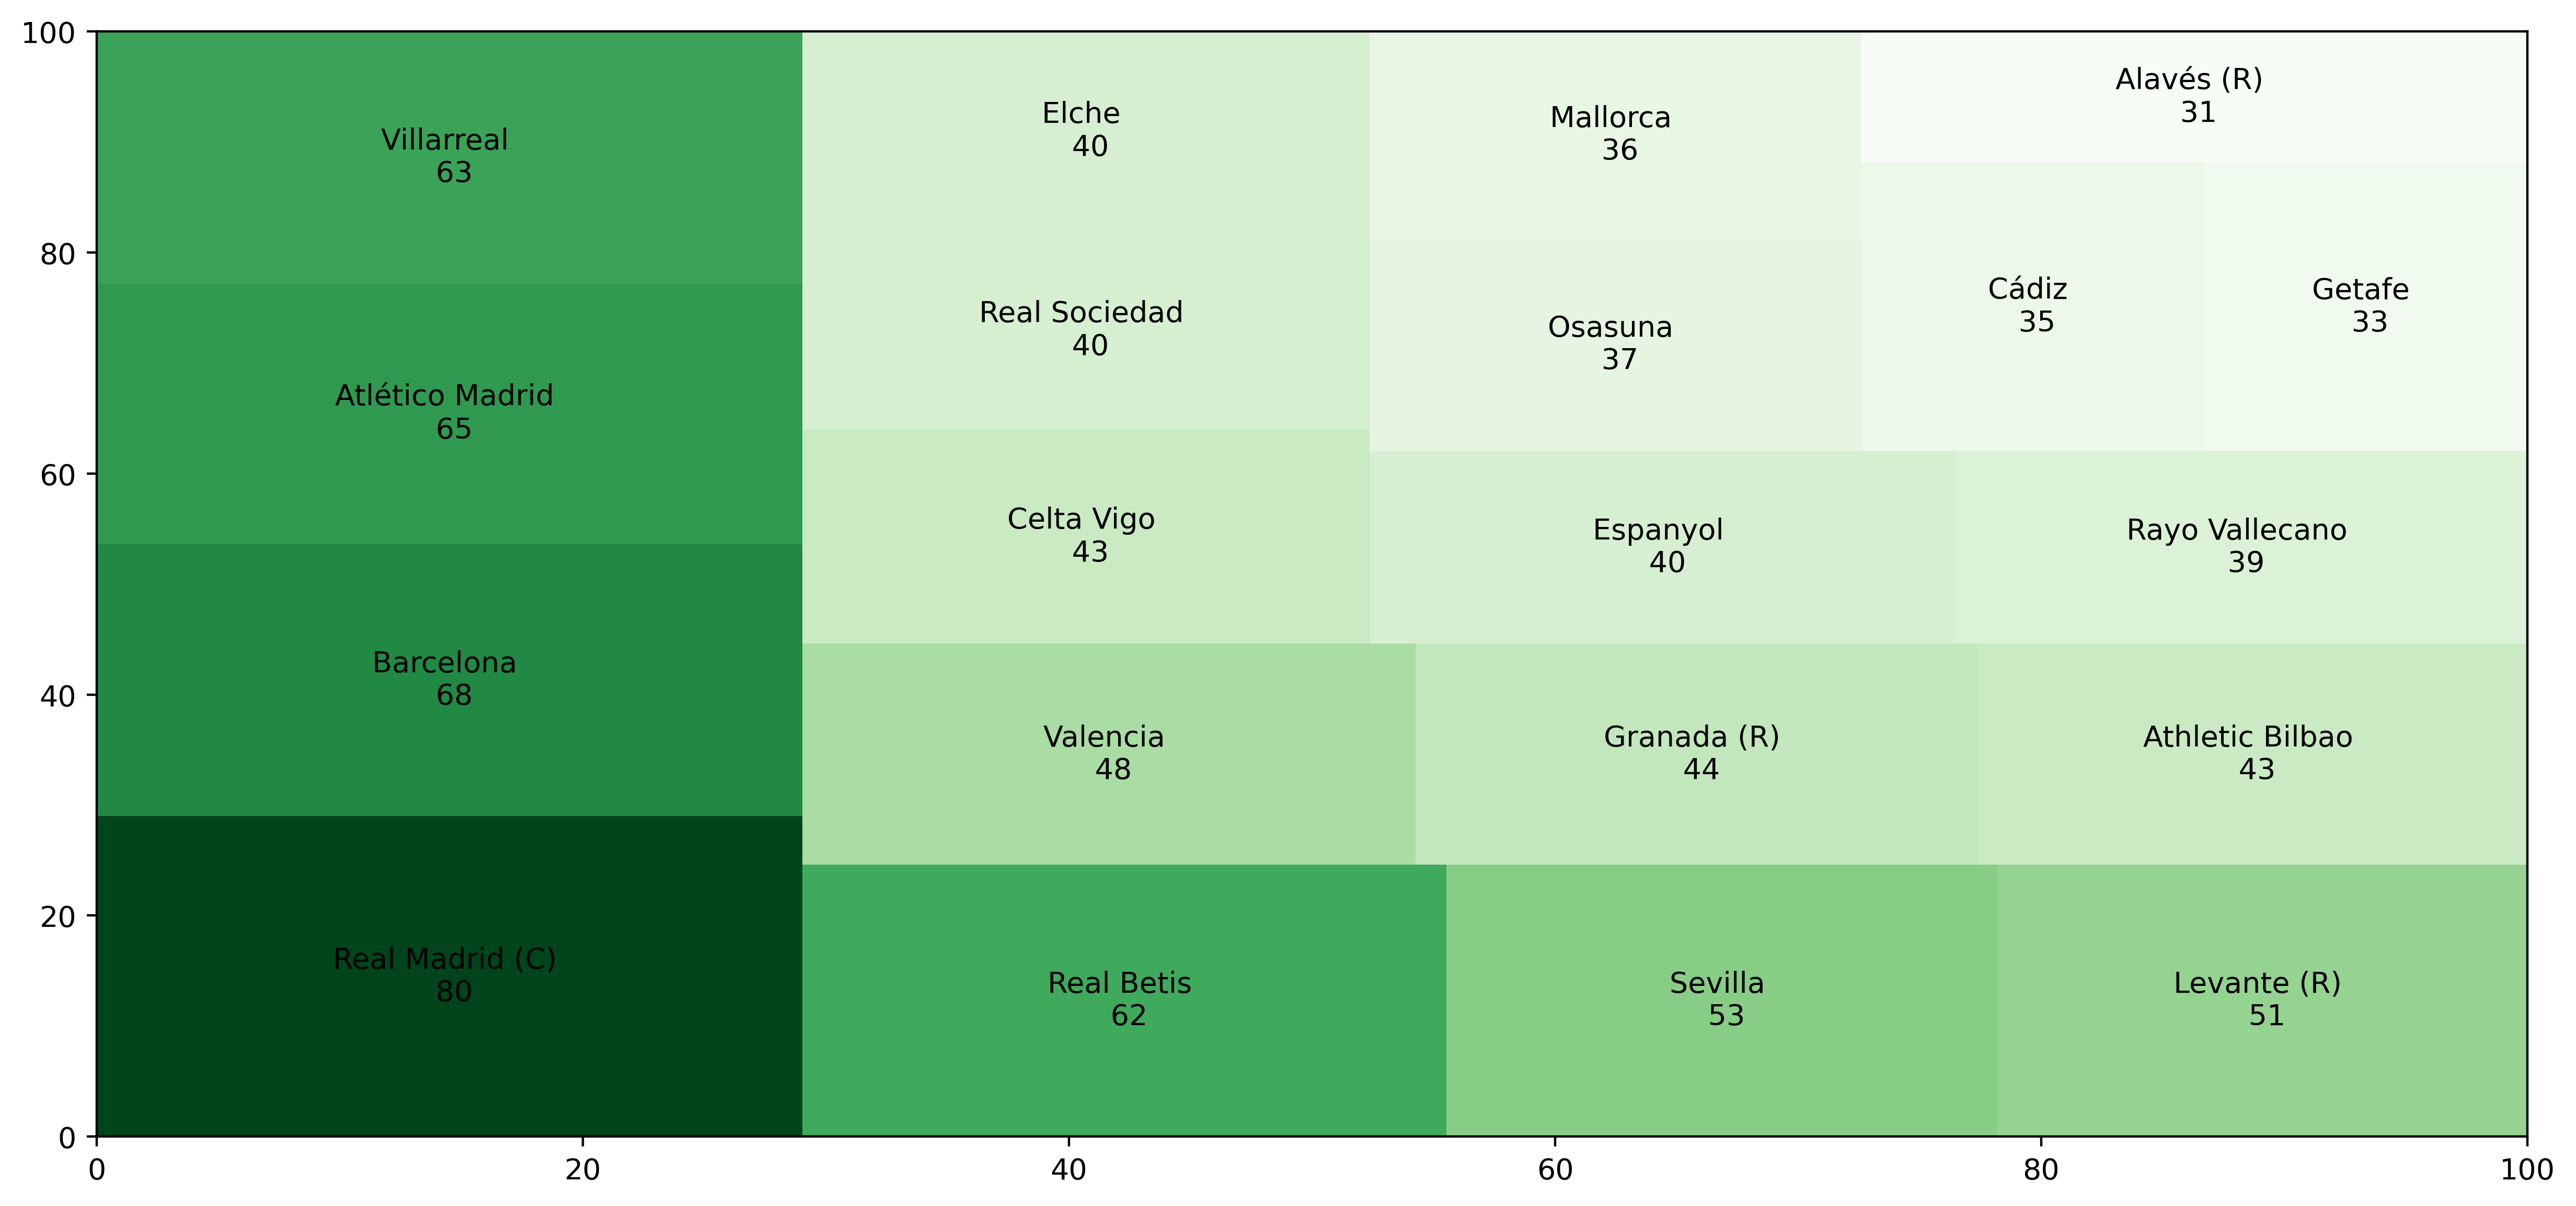

In [14]:
#Change the colour scheme 
team_data.sort(key = lambda x : x ['Scored'], reverse = True)

scored = [team["Scored"] for team in team_data]
    
names = [f'{team ["Name"]} \n {team["Scored"]}' for team in team_data]


norm = matplotlib.colors.Normalize(vmin = min(scored), vmax = max(scored))
colors = [matplotlib.cm.Greens(norm(value)) for value in scored]

fig, ax = plt.subplots(figsize = (15,7), dpi = 400)

squarify.plot(sizes = scored, label = names, color = colors)

<AxesSubplot:>

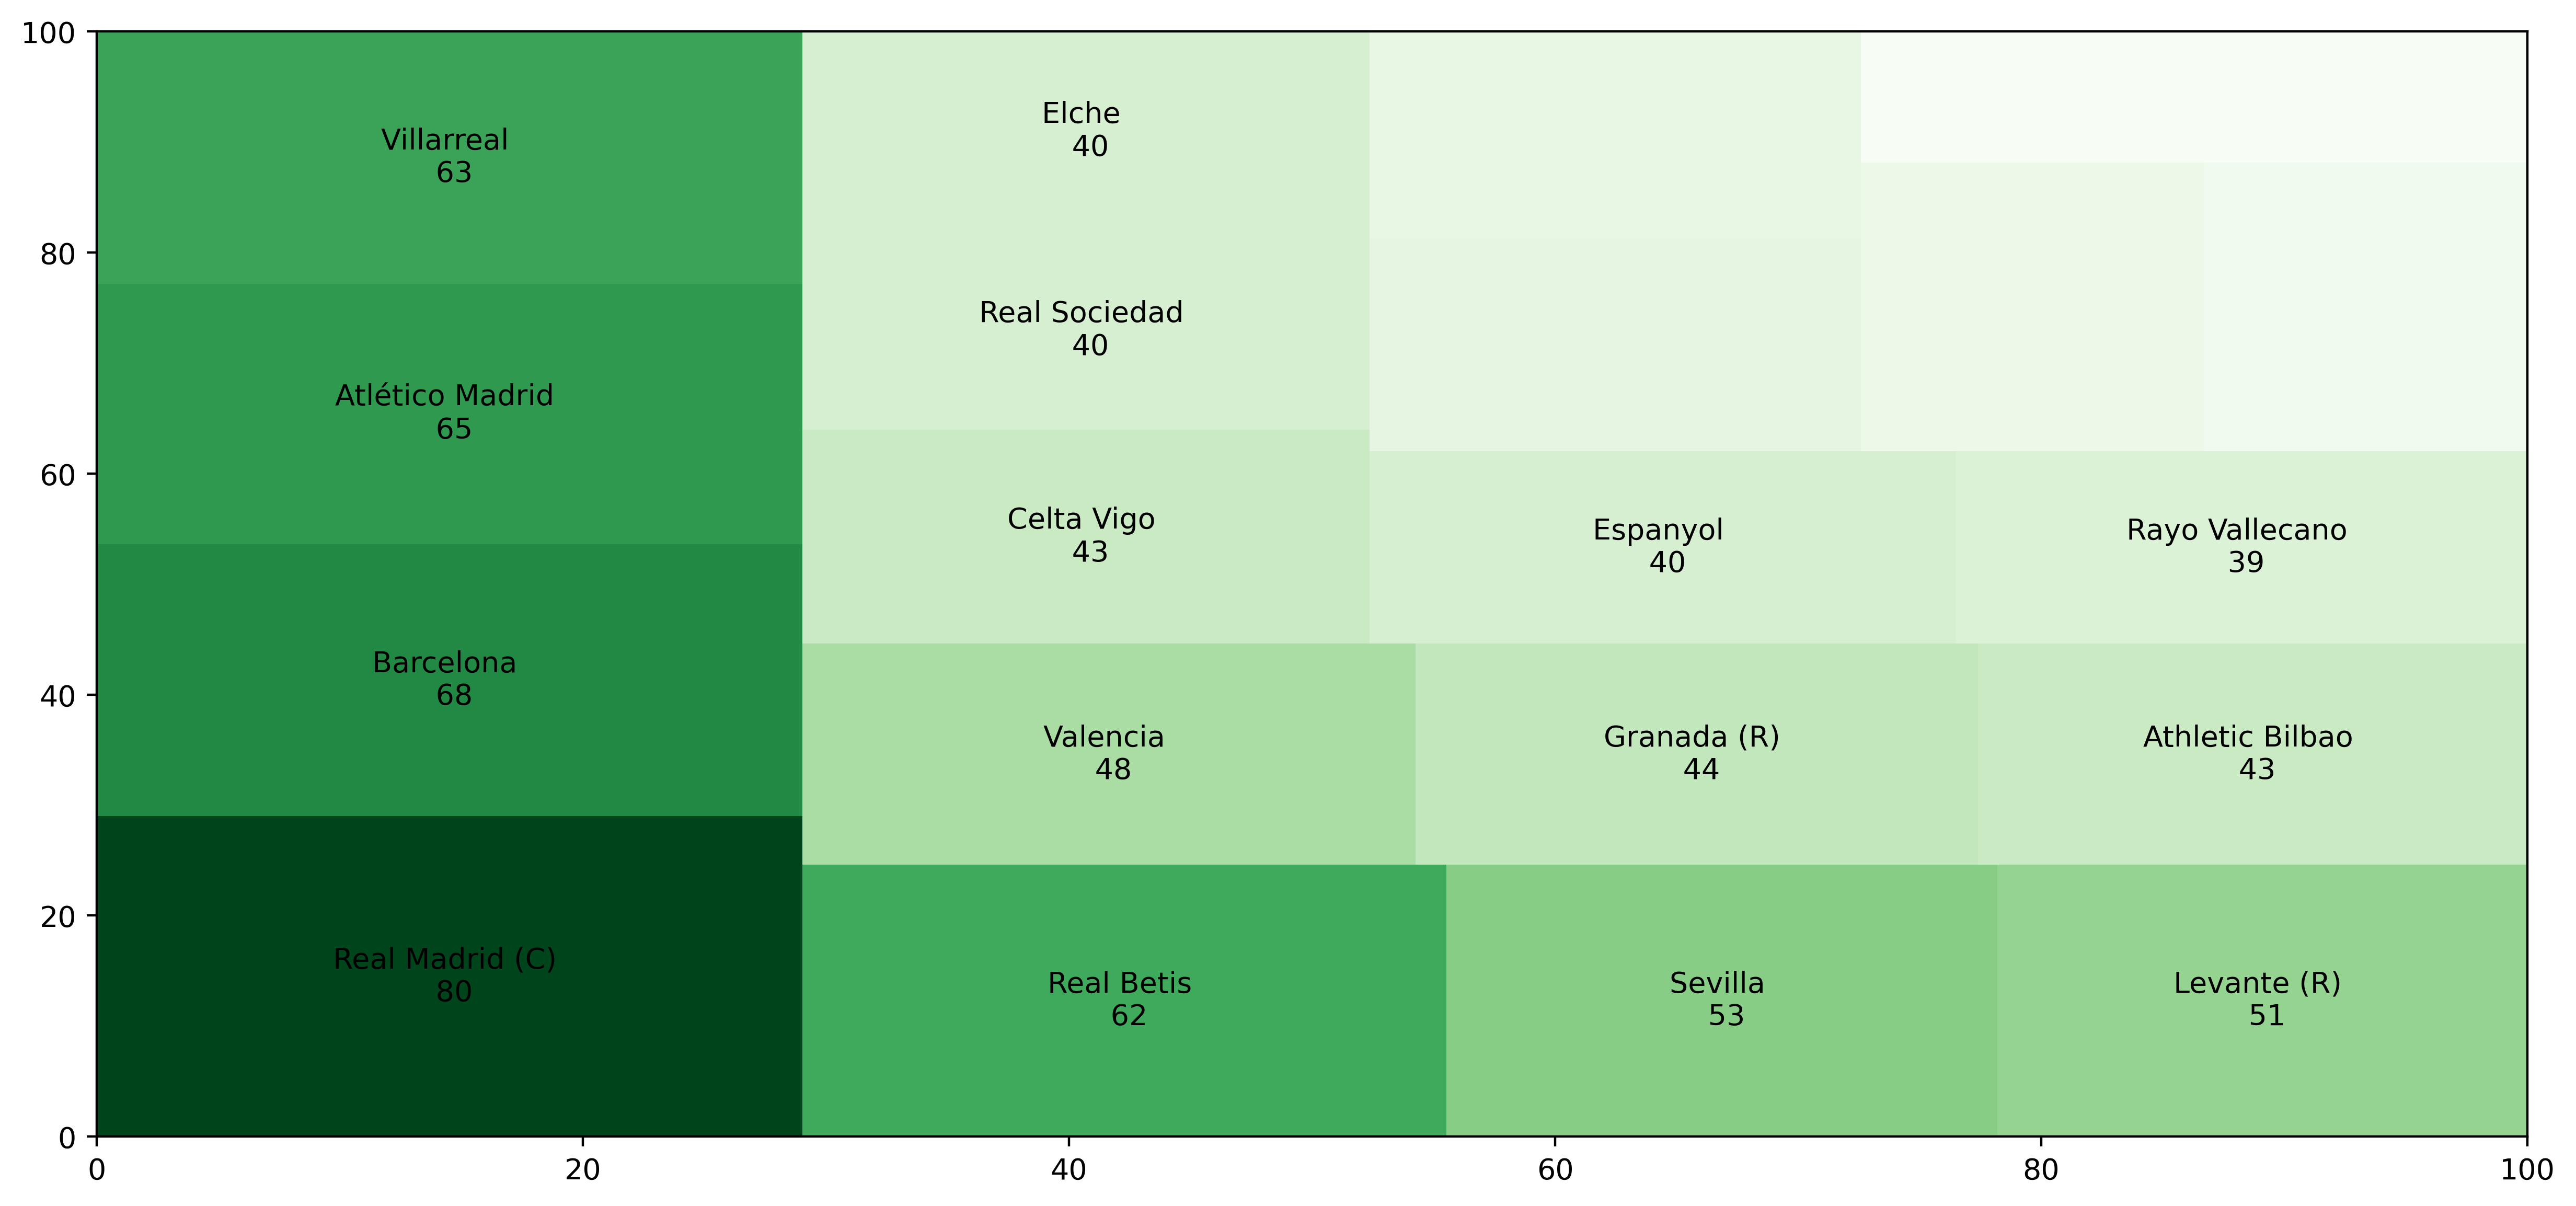

In [15]:
fig, ax = plt.subplots(figsize = (15,7),dpi=400)
squarify.plot(sizes = scored, label = names[:15], color = colors)

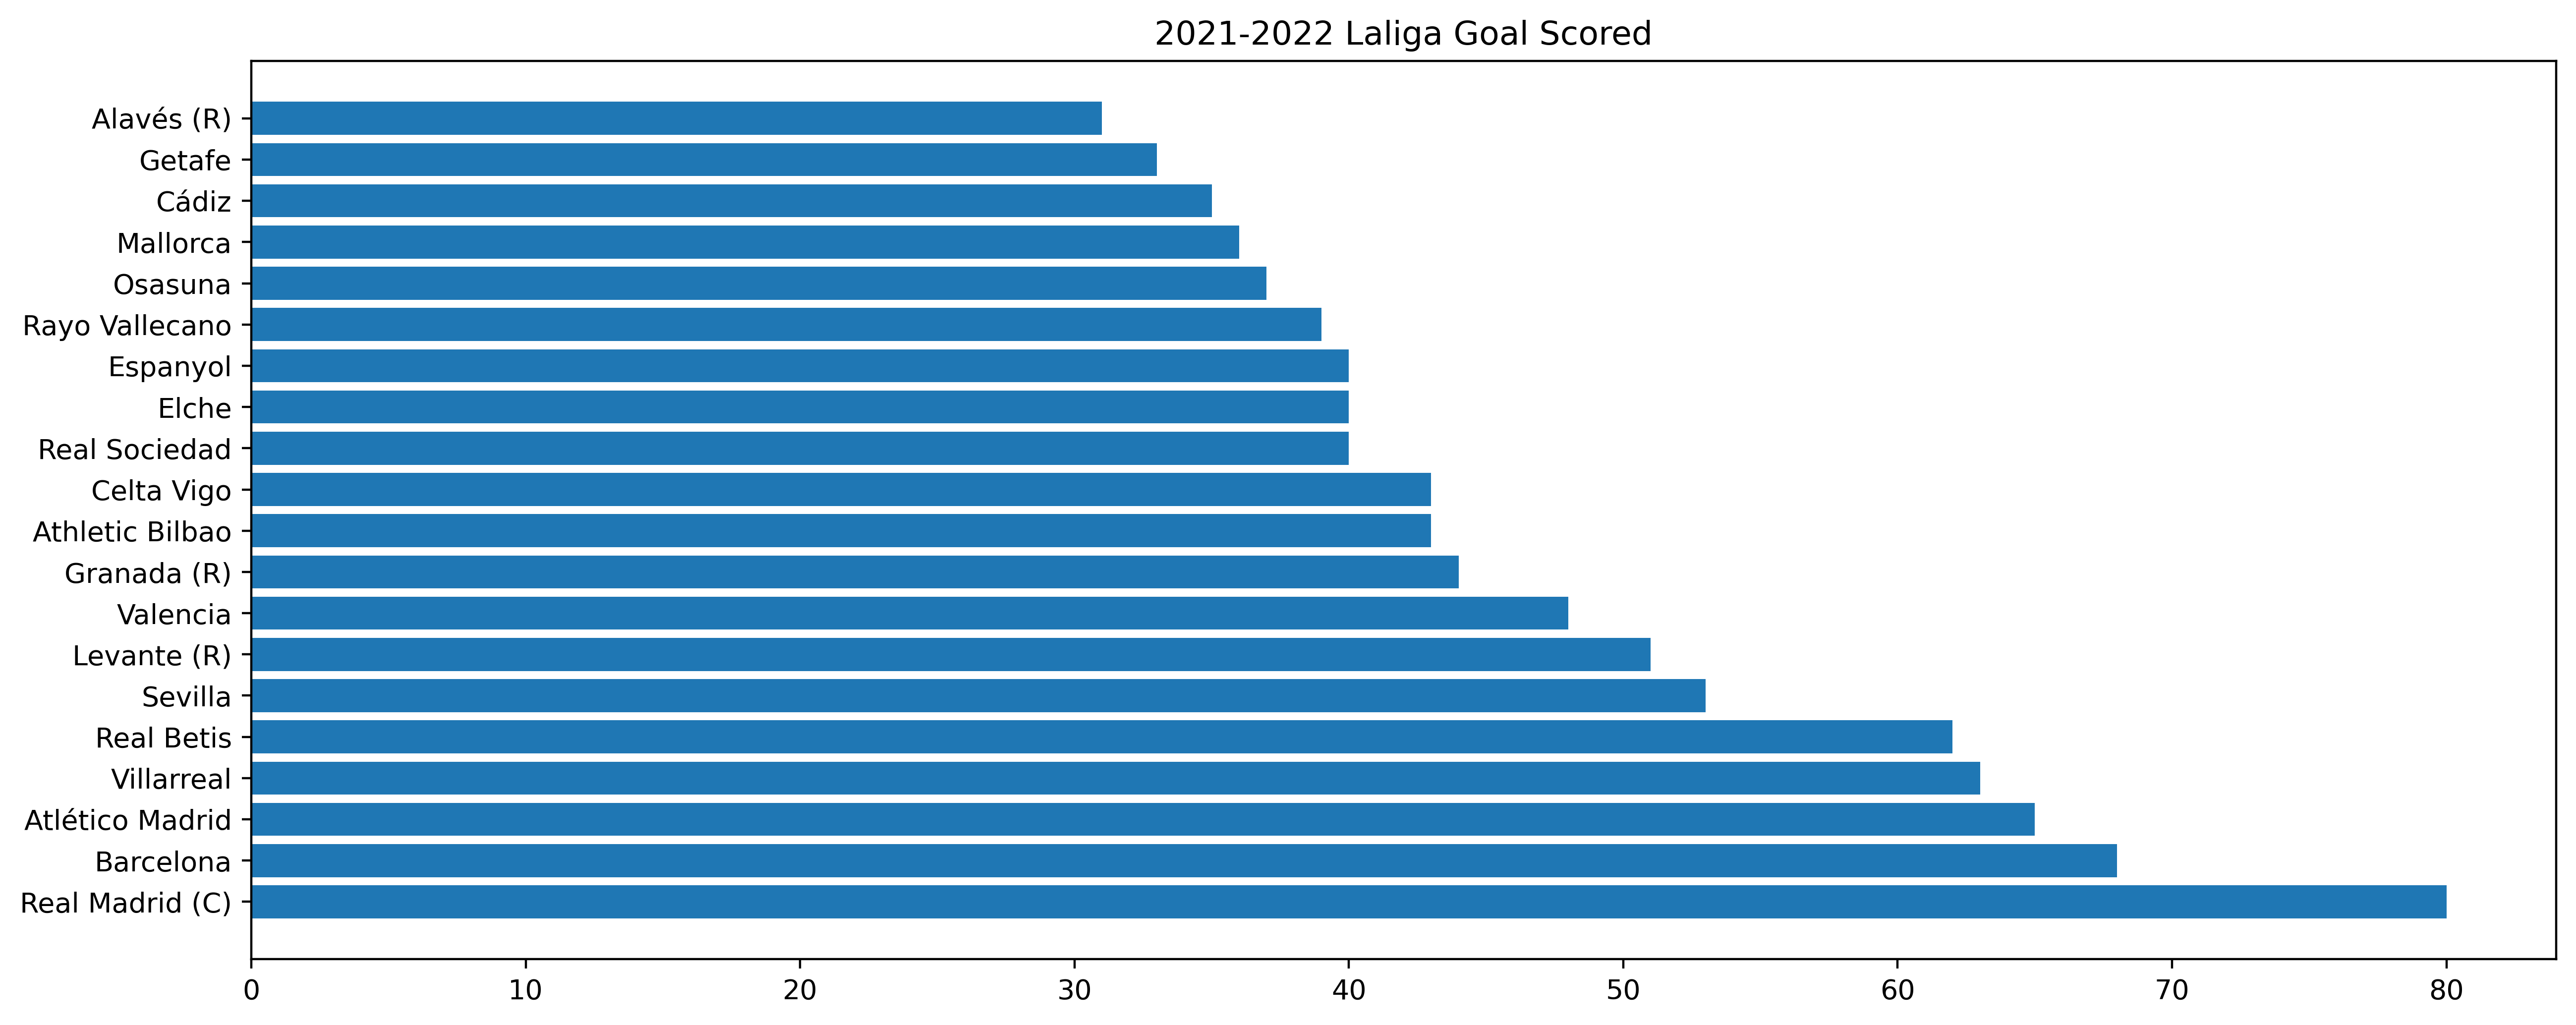

In [16]:
scored = [team["Scored"] for team in team_data]
names = [team['Name'] for team in team_data]
fig, ax = plt.subplots(figsize = (15,6),dpi = 400)

plt.barh(y = names, width = scored)
# set_linestyle('dashed')
plt.title("2021-2022 Laliga Goal Scored")
plt.show()